In [1]:
# import some necessary packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import operator
import plotly

# Try tSNE Plot
from sklearn.manifold import TSNE
# Try Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

# Scikit Learn Incremental PCA method
from sklearn.decomposition import IncrementalPCA

def openfile(fname):
    df = pd.read_table(fname)
    df1 = df.T
    df1 = df1.drop(['GENE'],axis=0)
    data = df1.values
    return data

def PCA(data):
    X = data
    ipca = IncrementalPCA(n_components=2, batch_size=500)
    X_ipca = ipca.fit_transform(X)
    return X_ipca

def tSNE(data,dim):
    return TSNE(n_components=dim, early_exaggeration=50,perplexity=300,verbose=100).fit_transform(data)

def AP(X):
    metric = {}
    for numc in range(2,100):
        af = AgglomerativeClustering(n_clusters=numc, affinity='cosine', memory=None, connectivity=None,
                                     compute_full_tree='auto', linkage='average').fit(X)
        labels = af.labels_
        metric[numc] = metrics.silhouette_score(X, labels, metric='cosine')
    return metric



In [2]:
if __name__ == "__main__":
    X = openfile("./Unprocessed_data/Gland.tsv")

<IPython.core.display.Javascript object>


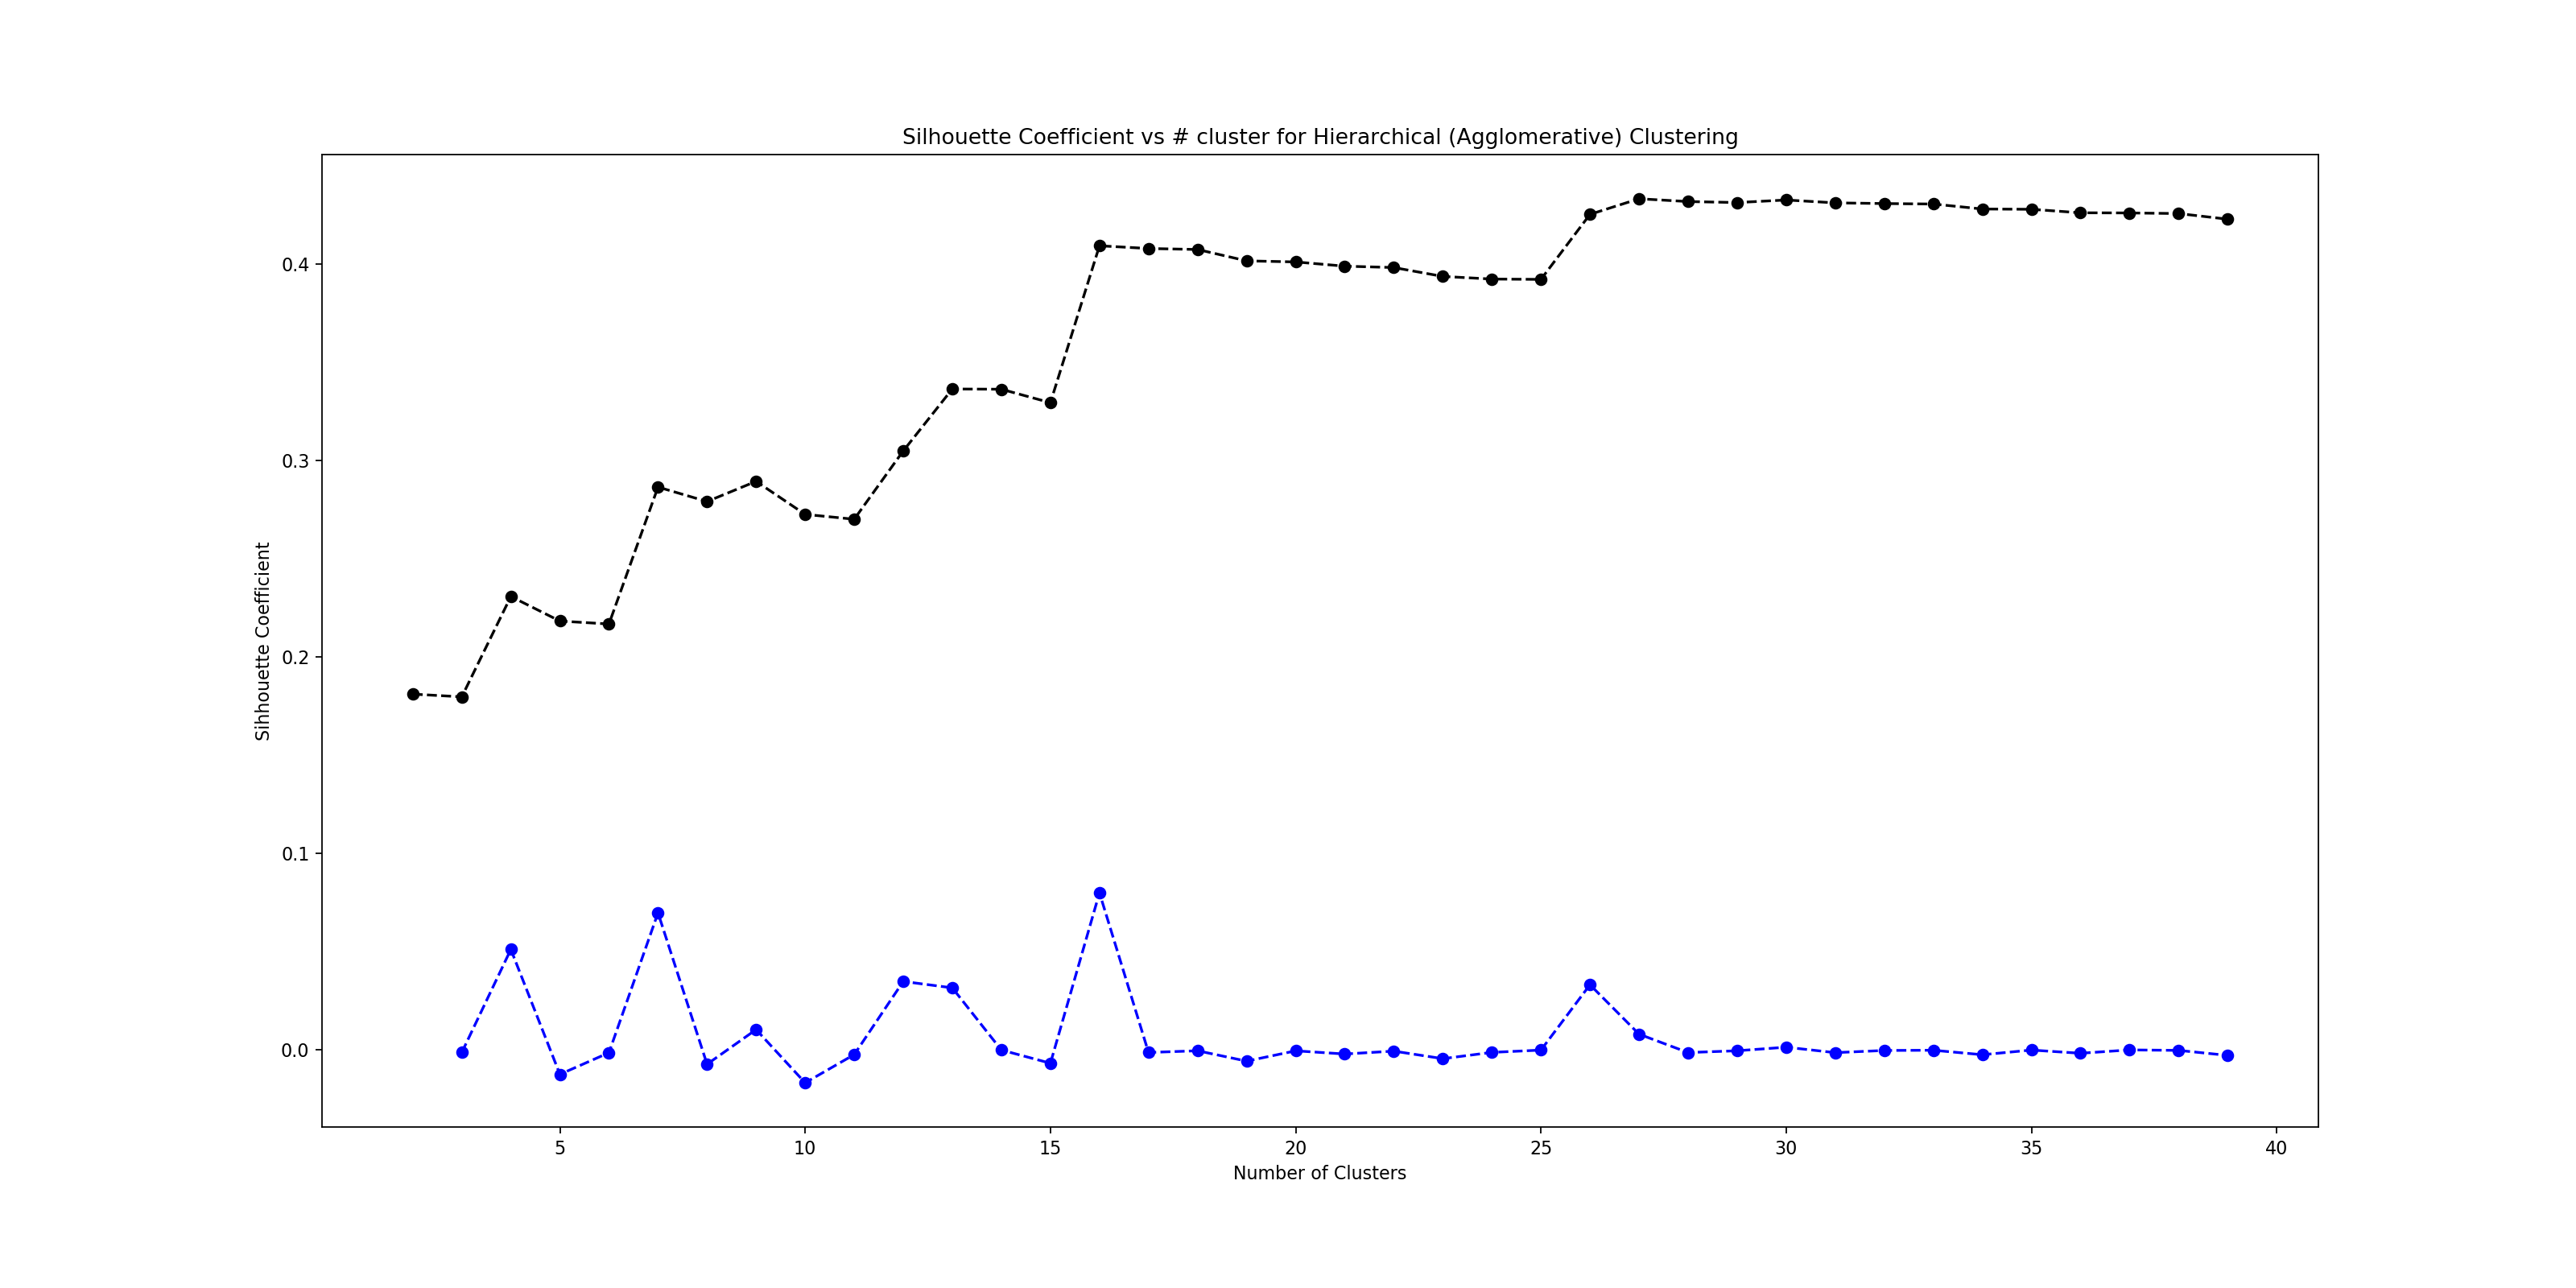

The lowest Sihouette Coefficient is: 0.179607058912
The number of clusters should be: 3
The highest Sihouette Coefficient is: 0.433068112174
The number of clusters should be: 27
(10, -0.016812621604799016)
(5, -0.012506047531568282)
(8, -0.0073584003422942357)
(15, -0.0068590420609511149)
(19, -0.005789248711232764)
(23, -0.0045352369905053425)
(39, -0.0028609874358078158)
(34, -0.0025280286885187575)
(11, -0.0024622931280058324)
(21, -0.0021618063762868789)
(36, -0.0017819334213731164)
(6, -0.0015016752380918597)
(31, -0.0014651384903851539)
(28, -0.0014171803215348167)
(17, -0.0013800914845564227)
(3, -0.0013787364375419942)
(24, -0.0013302229170060187)
(22, -0.00068863971417276737)
(20, -0.00053865660863627873)
(29, -0.0005079050339975022)
(18, -0.00050605058738673048)
(32, -0.00035596102234553006)
(38, -0.00031431475000393005)
(33, -0.00024136729138202195)
(25, -0.00016689721864820983)
(35, -0.00014619032647594787)
(14, -0.00012807727655061996)
(37, -7.7625714300755266e-05)
(30, 0.

In [21]:
# Running Agglomerative Clustering and plot average metrics from 3 to 
costs = AP(X)
x = list(costs.keys())
y = list(costs.values())
    

plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,y,linestyle = '--',marker='o',color = 'black',)
plt.title('Silhouette Coefficient vs # cluster for Hierarchical (Agglomerative) Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sihhouette Coefficient')
print("The lowest Sihouette Coefficient is:",min(y))
print("The number of clusters should be:",x[y.index(min(y))])
    

    
x1 = [i+3 for i in range(len(x)-1)]
y1 = [y[i+1]-y[i] for i in range(len(x)-1)]
change = [(i+3,y1[i]) for i in range(len(y1))]
plt.plot(x1,y1,linestyle = '--',marker='o',color = 'blue',)
plt.title('Silhouette Coefficient vs # cluster for Hierarchical (Agglomerative) Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Sihhouette Coefficient')
plt.show()
print("The highest Sihouette Coefficient is:",max(y))
print("The number of clusters should be:",x[y.index(max(y))])
    
change.sort(key = operator.itemgetter(1))
for one in change:
    print(str(one))
    

In [8]:
# get label from certain amoun of clusters (currently 16)  and plot pairwise cluster loss
finalnumc = 11

af = AgglomerativeClustering(n_clusters=finalnumc, affinity='cosine', memory=None, connectivity=None,
                                     compute_full_tree='auto', linkage='complete').fit(X)
labels = af.labels_
print(labels)


[ 9  9  1  9  1  9  9  9  1  9  9  9  5  9  9  9 10 10  9  1  4 10  9  2  5
  0  2  9  9  1  1  1  9  3 10  9 10  1  5 10  4  3  9  4  0  5  2  5  1  2
  9  1  4 10  2  2  2  5  9  0  2  2  1  0 10  1  3  0  0  0  0  9  2  0  0
  1  1  2  4  3  8 10  0  0  2  2 10  9  2  9  2  5 10  3  8  1  9  9  8 10
  2  9  4  0  2  4  8  4  4  9  9  3  2  2  0  4  2  0  2 10  2  2  2  9  0
  9  2  0  2  2  2  4  2  2  2  2  2  9 10  4  4  9  4  2  0  2  2 10  9  2
  2  2  5  2  2  2  2  2  2  4  0  2  5  4  2  9  1  4  3  4  9  3  2  2  2
  9  2  1  2  2  2  2  9  9  4  2  2  2  4  9  4  4  9  2  4  4  2  2 10  1
  9  2  0  2  4  2  9  2  2  0  2  4  2  4  2  2  2  0  0 10  4  4  2  2  2
 10  2  4  2  2  2  0  2  4  2  4  4  2  2  2  1  4  4  2  1  4  2  2  4  4
  2 10  4  1  4  2  2  1  3  4  2  1  2  4  2  2  9  9  2  4  2  1  2  2  2
  2  2 10  4  2  3  2  2 10  0  2  4  2  4  8  4  0  9 10  5  4 10  2  2  4
  2  2  2  2  9  2  9  2  9  2  4  2  4  2  9  2  5  5  4  0  2  2  2  2  2
  2  9  2 10

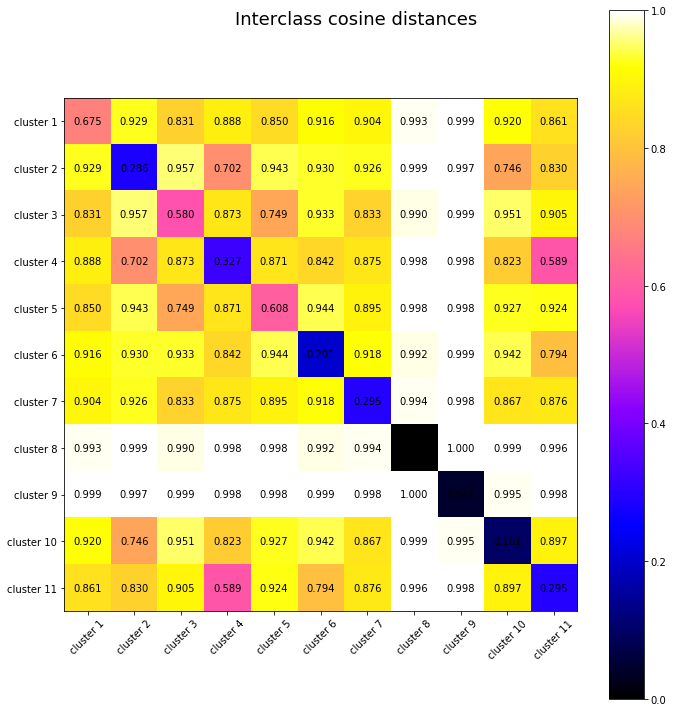

In [4]:
# Plot the distances
avg_dist = np.zeros((finalnumc, finalnumc))
plt.figure(figsize=(10, 10))
for i in range(finalnumc):
    for j in range(finalnumc):
        avg_dist[i, j] = pairwise_distances(X[labels == i], X[labels == j],
                                            metric="cosine").mean()
avg_dist /= avg_dist.max()
for i in range(finalnumc):
    for j in range(finalnumc):
        plt.text(i, j, '%5.3f' % avg_dist[i, j],
                 verticalalignment='center',
                 horizontalalignment='center')
plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,vmin=0)
plt.xticks(range(finalnumc), ["cluster "+str(i+1) for i in range(finalnumc)], rotation=45)
plt.yticks(range(finalnumc), ["cluster "+str(i+1) for i in range(finalnumc)])
plt.colorbar()
plt.suptitle("Interclass %s distances" % "cosine", size=18)
plt.tight_layout()
plt.show()

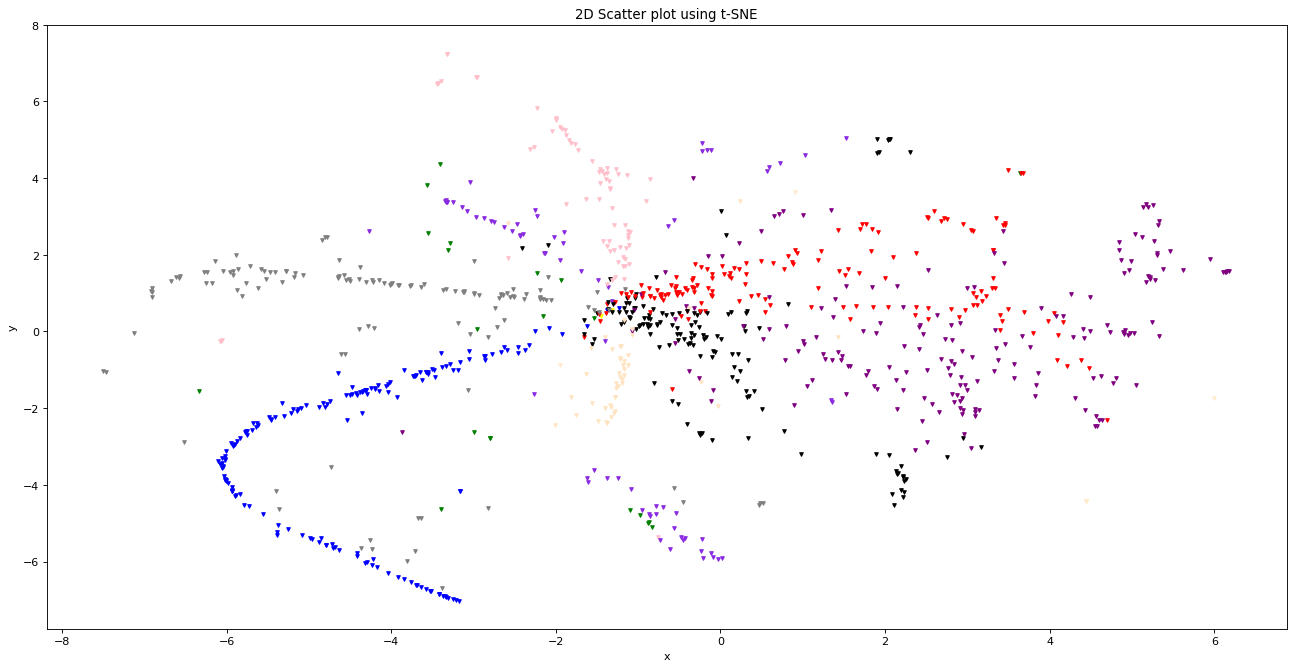

In [9]:
# Plotting the 2D tSNE graph
X_tsne2 = tSNE(X,2)
Xtsne2 = X_tsne2[:,0]
Ytsne2 = X_tsne2[:,1]
colors = ['black','grey','purple','green',
          'red','pink','bisque','yellow',
          'blanchedalmond','blue','blueviolet','brown',
          'burlywood','cadetblue','chartreuse','chocolate']
lisXtsne2 = Xtsne2.tolist()
lisYtsne2 = Ytsne2.tolist()
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
for i in range(len(lisXtsne2)):   
    plt.scatter(lisXtsne2[i],lisYtsne2[i],s=10,marker='v',c=colors[labels[i]])
    plt.title('2D Scatter plot using t-SNE')
    plt.xlabel('x')
    plt.ylabel('y')
plt.show()

<IPython.core.display.Javascript object>


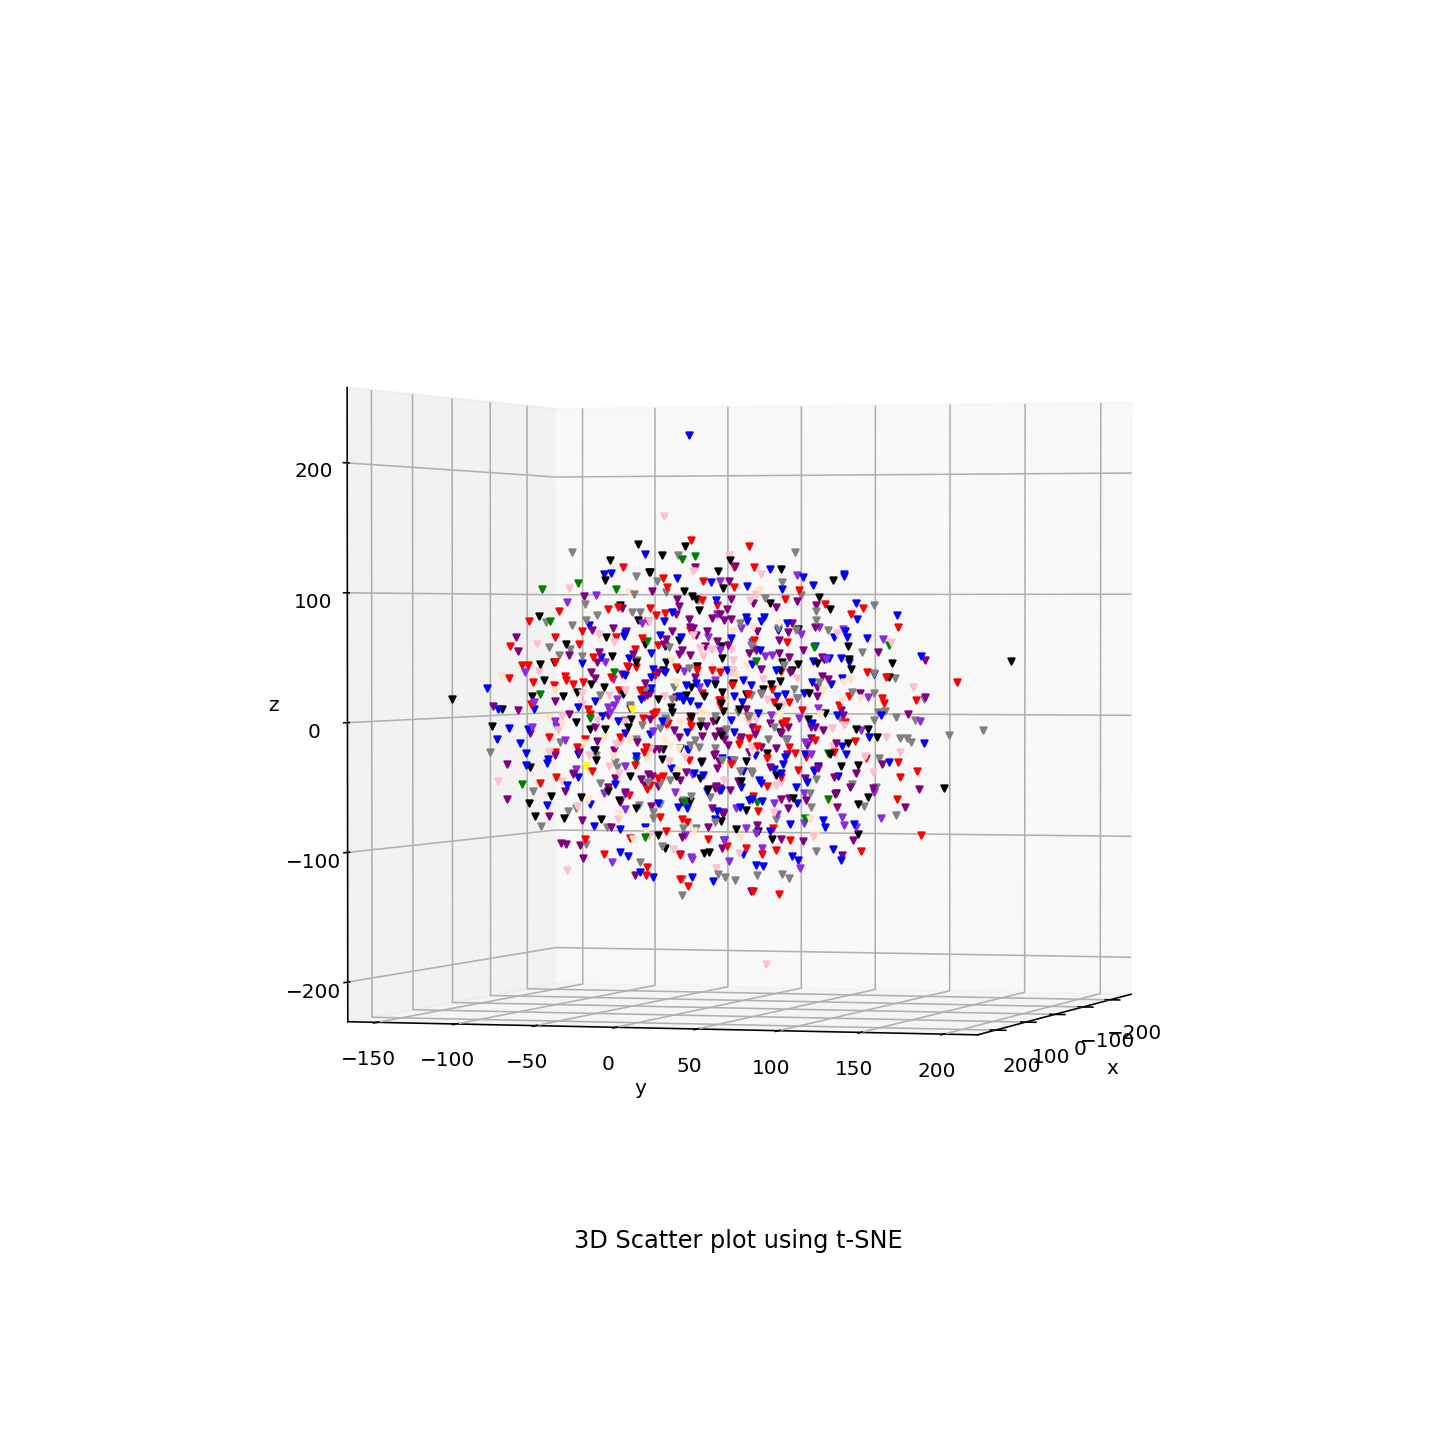

In [16]:
# Plotting the 3D tSNE graph

X_tsne3 = tSNE(X,3)
Xtsne3 = X_tsne3[:,0]
Ytsne3 = X_tsne3[:,1]
Ztsne3 = X_tsne3[:,2]
colors = ['black','grey','purple','green',
          'red','pink','bisque','yellow',
          'blanchedalmond','blue','blueviolet','brown',
          'burlywood','cadetblue','chartreuse','chocolate']
lisXtsne3 = Xtsne3.tolist()
lisYtsne3 = Ytsne3.tolist()
lisZtsne3 = Ztsne3.tolist()

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(lisXtsne3)):   
    ax.scatter(lisXtsne3[i],lisYtsne3[i],lisZtsne3[i],s=10,marker='v',c=colors[labels[i]])
    plt.title('3D Scatter plot using t-SNE')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

<IPython.core.display.Javascript object>


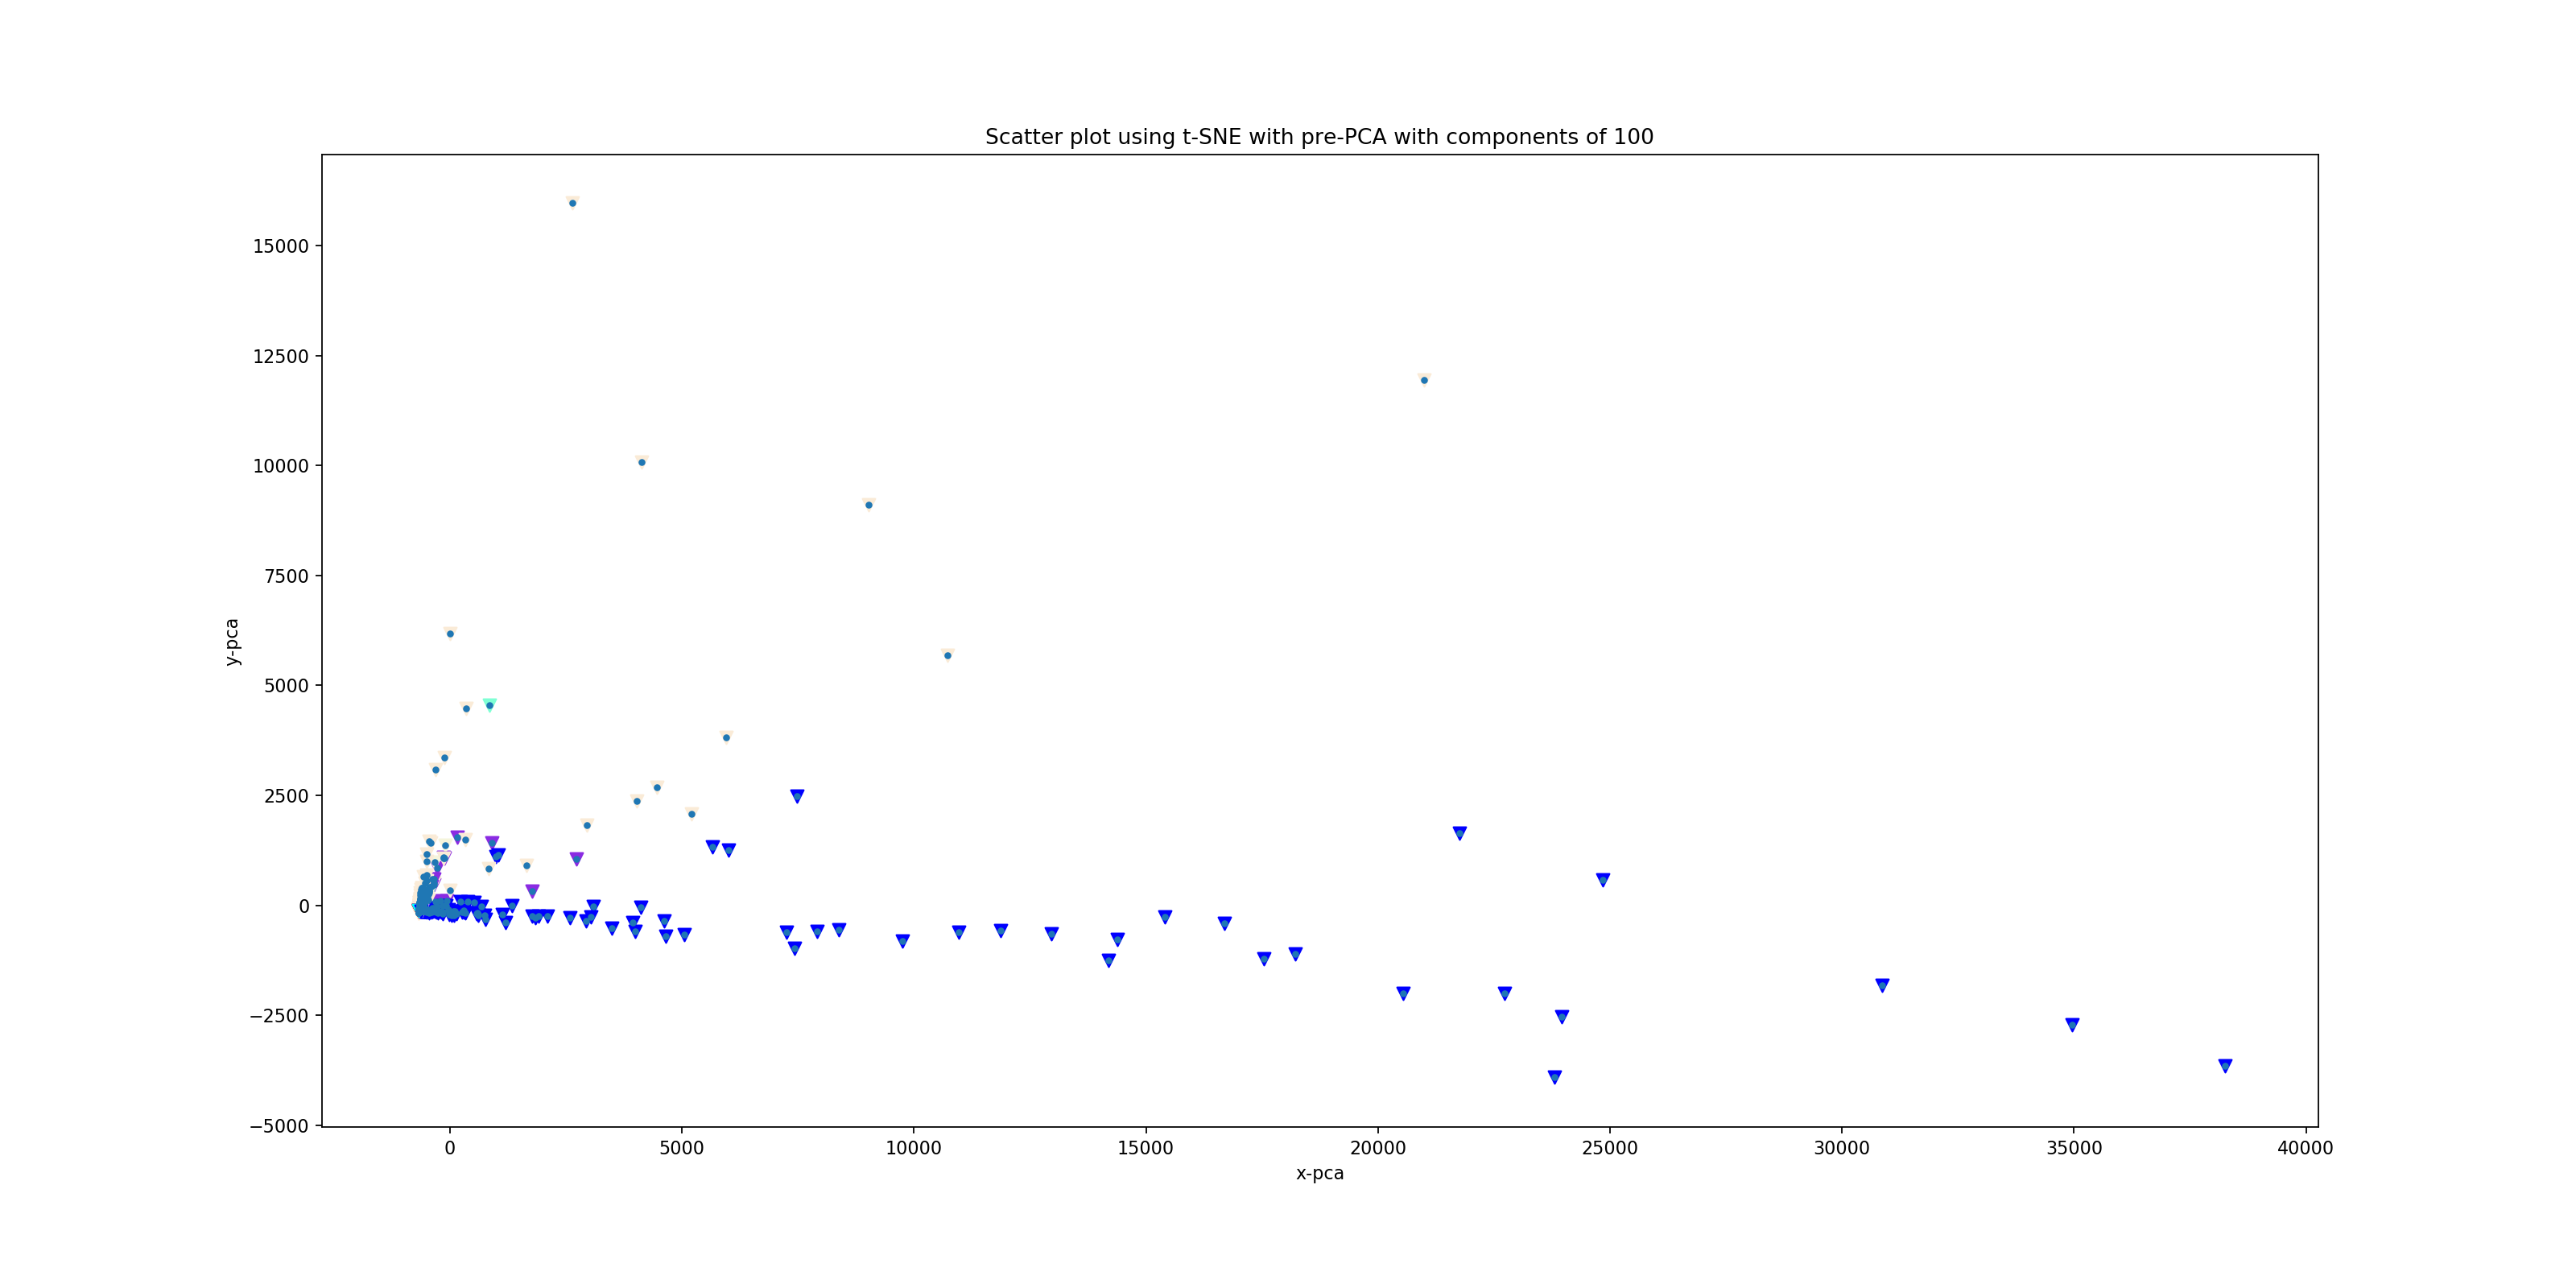

In [19]:
X_PCA = PCA(X)
Xpca = X_PCA[:,0]
Ypca = X_PCA[:,1]
colors = ['aliceblue','antiquewhite','aqua','aquamarine',
          'red','beige','bisque','black',
          'blanchedalmond','blue','blueviolet','brown',
          'burlywood','cadetblue','chartreuse','chocolate']
plt.figure(figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
lisXpca = Xpca.tolist()
lisYpca = Ypca.tolist()
for i in range(len(lisXpca)):   
    plt.scatter(lisXpca[i],lisYpca[i],s=50,marker='v',c=colors[labels[i]])
    plt.title('Scatter plot using t-SNE')
    plt.xlabel('x')
    plt.ylabel('y')
plt.scatter(Xpca,Ypca,s=8)
plt.title('Scatter plot using t-SNE with pre-PCA with components of 100')
plt.xlabel('x-pca')
plt.ylabel('y-pca')
plt.show()



In [ ]:
# Make Datafile
results = PCA(data)
results = results.tolist()
length = len(results[0])
header = ['GENE' for i in range(length)]
results.insert(0,header)
with open('./Processed_Gland_withoutPCA.tsv', 'w') as tsvfile:
    writer = csv.writer(tsvfile, delimiter='\t', lineterminator='\n')
    for rows in results:
        writer.writerow(rows)
